In [1]:
# library to load tabular data
import pandas as pd

In [3]:
# import yelp businesses dataset
business = pd.read_json('/Users/davidkaijiang/Downloads/yelp_dataset/yelp_academic_dataset_business.json', lines=True)

In [6]:
business.head(25)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


In [7]:
# Only keep the business that are still open (1 = open, 0 = closed)
business = business[business['is_open']==1]

In [8]:
# Separate the business categories
business_explode = business.assign(categories = business.categories.str.split(', ')).explode('categories')

In [9]:
# Find the categories containing coffee
business_explode[business_explode.categories.str.contains('offee',
                      case=True,na=False)].categories.value_counts()

Coffee & Tea             4954
Coffee Roasteries         238
Coffeeshops                 6
Coffee & Tea Supplies       5
Name: categories, dtype: int64

In [10]:
# Find the categories containing cafe
business_explode[business_explode.categories.str.contains('afe',
                      case=True,na=False)].categories.value_counts()

Cafes                   1712
Internet Cafes            80
Falafel                   57
Cafeteria                 30
Themed Cafes              21
Safe Stores               18
Safety Equipment          11
Hong Kong Style Cafe       4
Name: categories, dtype: int64

In [11]:
# filter for the coffee and cafe businesses
business_coffee = business[business['categories'].str.contains(
              'Coffee & Tea|Coffee Roasteries|Coffeeshops|Coffee & Tea Supplies|Cafes|Internet Cafes|Themed Cafes|Hong Kong Style Cafe',
              case=False, na=False)]

In [12]:
# import reviews dataset
size = 1000000
review = pd.read_json('/Users/davidkaijiang/Downloads/yelp_dataset/yelp_academic_dataset_review.json', lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [15]:
# Merge reviews and business tables
# There are multiple chunks to be read
chunk_list = []
for chunk_review in review:
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(business_coffee, chunk_review, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

82085 out of 1,000,000 related reviews
70056 out of 1,000,000 related reviews
63105 out of 1,000,000 related reviews
68573 out of 1,000,000 related reviews
66772 out of 1,000,000 related reviews
72840 out of 1,000,000 related reviews
77076 out of 1,000,000 related reviews


In [16]:
# Convert the new data frame into a CSV file
df.to_csv("yelp_reviews_coffee_categories.csv", index=False)

In [17]:
# import this new csv data frame
business_r = pd.read_csv('/Users/davidkaijiang/Downloads/yelp_dataset/yelp_reviews_coffee_categories.csv')

In [53]:
# import pandasql library to use SQL 
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [19]:
business_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500509 entries, 0 to 500508
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   500509 non-null  object 
 1   name          500508 non-null  object 
 2   address       500058 non-null  object 
 3   city          500507 non-null  object 
 4   state         500507 non-null  object 
 5   postal_code   500507 non-null  object 
 6   latitude      500507 non-null  float64
 7   longitude     500507 non-null  float64
 8   stars         500507 non-null  float64
 9   review_count  500507 non-null  float64
 10  is_open       500507 non-null  float64
 11  attributes    499918 non-null  object 
 12  categories    500507 non-null  object 
 13  hours         496576 non-null  object 
 14  review_id     500507 non-null  object 
 15  user_id       500507 non-null  object 
 16  review_stars  500507 non-null  float64
 17  useful        500507 non-null  float64
 18  funn

In [20]:
business_r.head(25)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,categories,hours,review_id,user_id,review_stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4.0,0.0,0.0,1.0,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4.0,3.0,1.0,2.0,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5.0,0.0,0.0,0.0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5.0,5.0,0.0,5.0,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4.0,2.0,1.0,1.0,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
5,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",_hJu0u6nB-8LIeQJY4Vg4w,KQSRUu4Aapl0hG6eu2v8iw,4.0,1.0,0.0,0.0,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25
6,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",DbARmo95_axUdC9FU8o_Jw,X_DkwPTzdO_VWzUcbUXREg,3.0,0.0,0.0,0.0,so I dropped in to this store since it was the...,2012-08-16 19:42:17
7,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",_xRGsS6QGpcD9LQJNtavuw,qUfRCH5NUyRDsJfM6jA5PQ,4.0,3.0,4.0,10.0,Impression: The good thing is that there are l...,2017-04-20 12:37:09
8,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",TLeFbl_5Cb1wcuaeQKX1ew,gNJNxucGoZ31nlH74EQpPg,4.0,0.0,0.0,0.0,Best egg tarts? \n\nI was lucky to get them fr...,2014-02-25 14:41:08
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",PXMn65bN0byT09LtOXUPuQ,NMOxipsnXc6olWdHYzXiYA,4.0,0.0,0.0,0.0,Little square cakes of happiness with cute bun...,2012-01-10 02:09:18


In [21]:
# Drop useless columns
drop_columns = ['latitude', 'longitude', 'is_open', 'useful', 'funny', 'cool']
business_r = business_r.drop(drop_columns, axis=1)

In [22]:
# Select only the reviews and businesses high rated (4 or 5 stars)
b_high_rating = pysqldf('''SELECT *
                        FROM business_r
                        WHERE (stars BETWEEN 4 AND 5) AND (review_stars BETWEEN 4 AND 5)''')

In [23]:
b_high_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308835 entries, 0 to 308834
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   308835 non-null  object 
 1   name          308835 non-null  object 
 2   address       308529 non-null  object 
 3   city          308835 non-null  object 
 4   state         308835 non-null  object 
 5   postal_code   308835 non-null  object 
 6   stars         308835 non-null  float64
 7   review_count  308835 non-null  float64
 8   attributes    308451 non-null  object 
 9   categories    308835 non-null  object 
 10  hours         307442 non-null  object 
 11  review_id     308835 non-null  object 
 12  user_id       308835 non-null  object 
 13  review_stars  308835 non-null  float64
 14  text          308835 non-null  object 
 15  date          308834 non-null  object 
dtypes: float64(3), object(13)
memory usage: 37.7+ MB


In [24]:
b_high_rating.head(25)

,business_id,name,address,city,state,postal_code,stars,review_count,attributes,categories,hours,review_id,user_id,review_stars,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4.0,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4.0,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5.0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5.0,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4.0,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
5,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",_hJu0u6nB-8LIeQJY4Vg4w,KQSRUu4Aapl0hG6eu2v8iw,4.0,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25
6,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",_xRGsS6QGpcD9LQJNtavuw,qUfRCH5NUyRDsJfM6jA5PQ,4.0,Impression: The good thing is that there are l...,2017-04-20 12:37:09
7,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",TLeFbl_5Cb1wcuaeQKX1ew,gNJNxucGoZ31nlH74EQpPg,4.0,Best egg tarts? \n\nI was lucky to get them fr...,2014-02-25 14:41:08
8,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",PXMn65bN0byT09LtOXUPuQ,NMOxipsnXc6olWdHYzXiYA,4.0,Little square cakes of happiness with cute bun...,2012-01-10 02:09:18
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",YY_qfBTB6j6EFhYHWdS7DQ,ZO3Hh2lSFWmiPjDj0Wad5w,4.0,This is my second favorite place for pastries ...,2011-12-06 03:29:07


In [25]:
# What are some recurrent positive characteristics that are often mentioned in the Yelp customer reviews?
# Let's search for the most mentioned words in the top rated coffeshops reviews
# Let's first exclude certains words
stopwords = [
   "-", " ", "", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"
]

sw_df = pd.DataFrame(stopwords, columns=['stopword'])

In [26]:
# Top 20 most frequent words in the top rated coffeeshops reviews
from collections import Counter

no_sw = b_high_rating.text.apply(lambda word: [word.lower() for word in str(word).split(' ') if word.lower() not in stopwords])

corpus = []
for ea in no_sw:
    corpus += ea
wordDict = Counter(corpus)

[ (k, v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True) ][:20]

[('place', 129807),
 ('great', 127168),
 ('coffee', 116621),
 ('food', 99459),
 ('good', 87575),
 ('love', 64006),
 ('breakfast', 53468),
 ('time', 51790),
 ('service', 49466),
 ('nice', 44868),
 ('friendly', 41766),
 ('staff', 40733),
 ('delicious', 39680),
 ('ordered', 39541),
 ('fresh', 32994),
 ('wait', 31790),
 ('menu', 31076),
 ('super', 29446),
 ('order', 28794),
 ('favorite', 28745)]

In [27]:
# import wordcloud library to generate a wordcloud visualization
from wordcloud import WordCloud

In [29]:
# import matplot library to draw plots
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

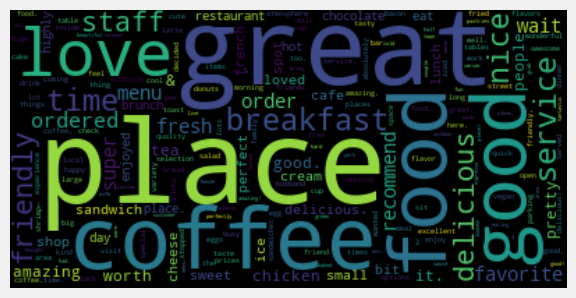

In [30]:
# generate wordcloud visualization of the most mentioned words in the top rated coffeeshops reviews
from collections import Counter


no_sw = b_high_rating.text.apply(lambda word: [word.lower() for word in str(word).split(' ') if word.lower() not in stopwords])

corpus = []
for ea in no_sw:
    corpus += ea
wordDict = Counter(corpus)

[ (k, v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True) ][:20]
wordcloud = WordCloud().generate_from_frequencies(wordDict)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [31]:
# Create a dataframe without the text column to make some querying faster
drop_columns = ['text']
business_r_no_text = business_r.drop(drop_columns, axis=1)

In [32]:
# What location is the most preferred by customers who enjoy going to coffeeshops?
reviews_cities = pysqldf('''SELECT city, COUNT(*) AS cnt FROM business_r_no_text GROUP BY city ORDER BY cnt DESC LIMIT 10''')

<AxesSubplot:title={'center':'Cities with the Most Coffeeshops Yelp Reviews'}, xlabel='city'>

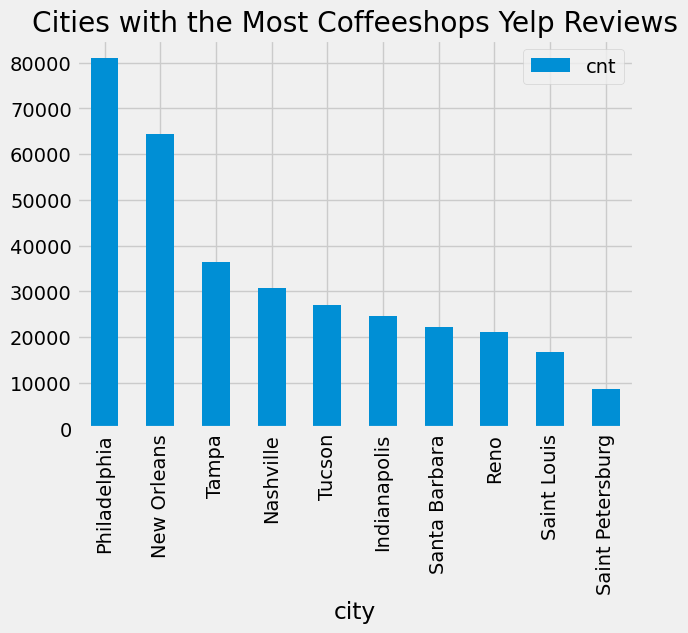

In [80]:
reviews_cities.plot.bar(x='city', y='cnt', title = 'Cities with the Most Coffeeshops Yelp Reviews')

In [34]:
# Import another dataset containing the number of visits of each business
size = 1000000
checkin = pd.read_json('/Users/davidkaijiang/Downloads/yelp_dataset/yelp_academic_dataset_checkin.json', lines=True,
                      dtype={'business_id':str,
                             'date':str},
                      chunksize=size)

In [35]:
# Merge checkin and business tables
# There are multiple chunks to be read
chunk_list = []
for chunk_checkin in checkin:
    # Inner merge with edited business file so only checkin related to the business remain
    chunk_merged = pd.merge(business_coffee, chunk_checkin, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related checkins")
    chunk_list.append(chunk_merged)
# After trimming down the checkin file, concatenate all relevant data back to one dataframe
df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

6008 out of 1,000,000 related checkins


In [36]:
# Convert the new data frame into a CSV file
df.to_csv("yelp_reviews_coffee_checkins.csv", index=False)

In [38]:
# import this new csv data frame
coffee_checkins = pd.read_csv('/Users/davidkaijiang/Downloads/yelp_dataset/yelp_reviews_coffee_checkins.csv')

In [39]:
coffee_checkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6008 entries, 0 to 6007
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   6008 non-null   object 
 1   name          6008 non-null   object 
 2   address       5993 non-null   object 
 3   city          6008 non-null   object 
 4   state         6008 non-null   object 
 5   postal_code   6008 non-null   object 
 6   latitude      6008 non-null   float64
 7   longitude     6008 non-null   float64
 8   stars         6008 non-null   float64
 9   review_count  6008 non-null   int64  
 10  is_open       6008 non-null   int64  
 11  attributes    5942 non-null   object 
 12  categories    6008 non-null   object 
 13  hours         5771 non-null   object 
 14  date          6008 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 704.2+ KB


In [40]:
#drop unecessary columns in coffee_checkins
drop_columns = ['name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']
coffee_checkins = coffee_checkins.drop(drop_columns, axis=1)

In [42]:
#display all the data of coffee_checkins
pd.set_option('display.max_colwidth', None)
coffee_checkins.head(25)

business_id  \
0   MTSW4McQd7CbVtyjqoe9mw   
1   JX4tUpd09YFchLBuI43lGw   
2   ppFCk9aQkM338Rgwpl2F5A   
3   IDtLPgUrqorrpqSLdfMhZQ   
4   oaboaRBUgGjbo2kfUIKDLQ   
5   h_qlv6CIXGVurFOhFQ945w   
6   yM8LlTInbQH4FwWC97lz6w   
7   2dlQX5sP9X6Dlm1MmNOlSw   
8   bTve2mwLk5Zc01vRKqc2KQ   
9   py5aKmlTB2NarfsfcOpHOQ   
10  _T0cPZE2ZJOTTlYYKMP64Q   
11  IOZrqUQ2Jg6UeQ5CWpsmkg   
12  aNXw3PkXVt8ANwLyCfcmpg   
13  JwBTq6IOFH97b9Hr6RT7pw   
14  cl5NjtALgaX7E-WL2DtiYQ   
15  516L9-ZWyqVgzqjP5uW7Jg   
16  gb7JjRJtzWDsIWpJihZhBQ   
17  JPm93BlP-UHYPqFgK66JUw   
18  VeFfrEZ4iWaecrQg6Eq4cg   
19  9qxMhGWjGsuPUoQB3Y74Wg   
20  VCkSUsdL5P0p16DAPxVROA   
21  dIpTuL2T1L98GQGU17IeSw   
22  vxrGNnuEef7YCfB7mN08rA   
23  6_Zf2QsRHCH1RhbzA9inyw   
24  lPPYZr1_jx0XeW-xR9WJtw   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [43]:
# Split the checkins into separate rows so that there is onyl one checkin per row
checkins_separate = pysqldf('''WITH RECURSIVE split(business_id, date, str) AS (
    SELECT business_id, '', date||',' FROM coffee_checkins
    UNION ALL SELECT
    business_id,
    substr(str, 0, instr(str, ',')),
    substr(str, instr(str, ',')+1)
    FROM split WHERE str!=''
)
SELECT business_id, date
FROM split
WHERE date!='';''')

In [59]:
checkins_separate.head(25)

,business_id,date
0,MTSW4McQd7CbVtyjqoe9mw,2010-08-18 17:05:36
1,JX4tUpd09YFchLBuI43lGw,2013-03-07 04:08:36
2,ppFCk9aQkM338Rgwpl2F5A,2010-06-14 03:37:29
3,IDtLPgUrqorrpqSLdfMhZQ,2016-07-10 21:28:20
4,oaboaRBUgGjbo2kfUIKDLQ,2010-03-19 22:20:34
5,h_qlv6CIXGVurFOhFQ945w,2010-08-06 15:05:35
6,yM8LlTInbQH4FwWC97lz6w,2010-07-05 01:18:34
7,2dlQX5sP9X6Dlm1MmNOlSw,2013-07-27 18:28:11
8,bTve2mwLk5Zc01vRKqc2KQ,2010-05-31 11:57:58
9,py5aKmlTB2NarfsfcOpHOQ,2017-03-31 09:47:27


In [50]:
checkins_separate_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293935 entries, 0 to 1293934
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   business_id  1293935 non-null  object
 1   date         1293935 non-null  object
dtypes: object(2)
memory usage: 19.7+ MB


In [63]:
df.to_csv("yelp_business_coffee.csv", index=False)

In [64]:
business_coffee = pd.read_csv('/Users/davidkaijiang/Downloads/yelp_dataset/yelp_business_coffee.csv')

In [65]:
# Cities with the most coffeeshops visits (checkins)
popular_cities = pysqldf('''SELECT b.city, COUNT(*) AS cnt 
                            FROM checkins_separate AS c
                            LEFT JOIN business_coffee AS b
                            ON c.business_id = b.business_id
                            GROUP BY b.city 
                            ORDER BY cnt DESC 
                            LIMIT 10''')

<AxesSubplot:title={'center':'Cities with the Most Coffeeshops Visits'}, xlabel='city'>

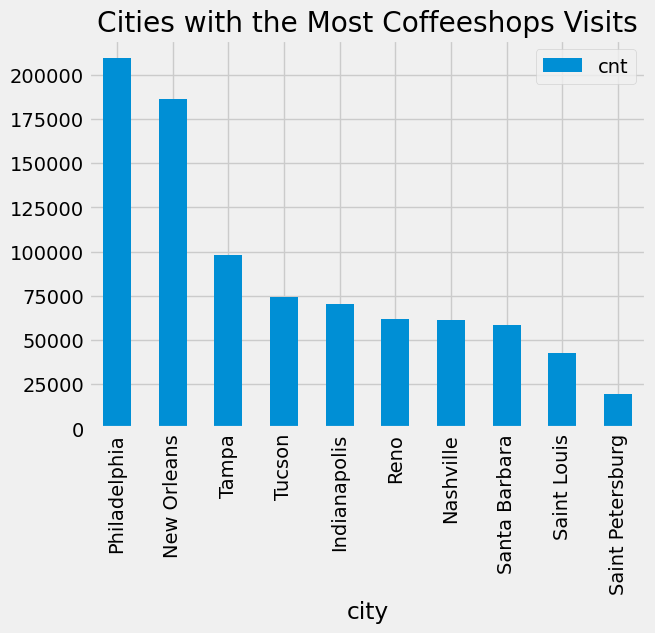

In [66]:
popular_cities.plot.bar(x='city', y='cnt', title = 'Cities with the Most Coffeeshops Visits')

In [69]:
# Philadelphia Streets with the Most Coffeeshops Yelp Reviews
philadelphia_streets = pysqldf('''SELECT 
                                    SUBSTR(address,    instr(address, ' ') + 1) AS street_name,
                                    COUNT(*) AS cnt
                                FROM business_r
                                WHERE address IS NOT null and city = "Philadelphia"
                                GROUP BY street_name
                                ORDER BY cnt DESC
                                LIMIT 20''')

<AxesSubplot:title={'center':'Philadelphia Streets with the Most Coffeeshops Yelp Reviews'}, xlabel='street_name'>

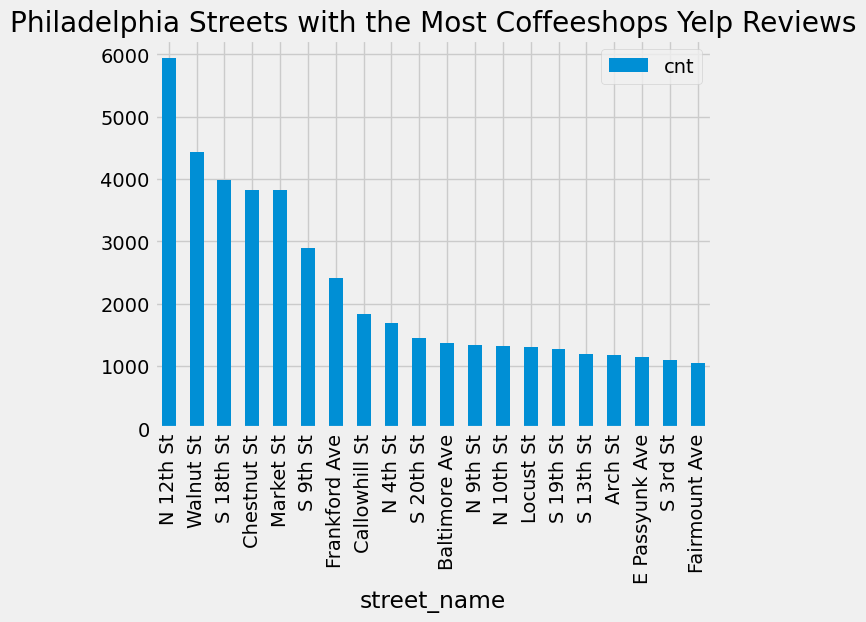

In [72]:
philadelphia_streets.plot.bar(x='street_name', y='cnt', title = 'Philadelphia Streets with the Most Coffeeshops Yelp Reviews')

In [75]:
# Philadelphia streets with the most coffeeshops visits
popular_phily_streets = pysqldf('''SELECT 
                                    SUBSTR(b.address,    instr(b.address, ' ') + 1) AS street_name,
                                    COUNT(*) AS cnt
                                FROM checkins_separate AS c
                                LEFT JOIN business_coffee AS b
                                ON c.business_id = b.business_id
                                WHERE b.address IS NOT null and b.city = "Philadelphia"
                                GROUP BY street_name
                                ORDER BY cnt DESC
                                LIMIT 20''') 

<AxesSubplot:title={'center':'Philadelphia Streets with the Most Coffeeshops Visits'}, xlabel='street_name'>

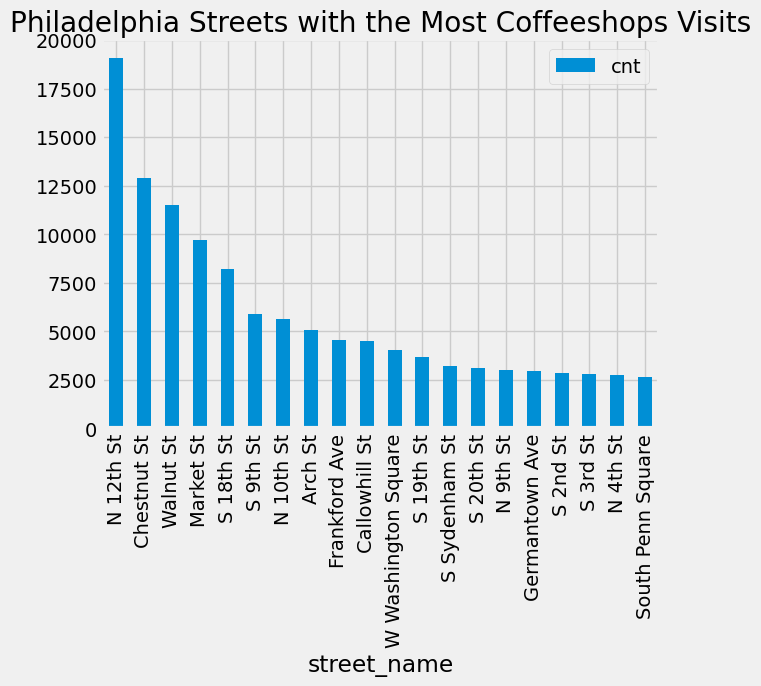

In [84]:
popular_phily_streets.plot.bar(x='street_name', y='cnt', title = 'Philadelphia Streets with the Most Coffeeshops Visits')

In [82]:
# New Orleans Streets with the Most Coffeeshops Yelp Reviews
newOrleans_streets = pysqldf('''SELECT 
                                    SUBSTR(address,    instr(address, ' ') + 1) AS street_name,
                                    COUNT(*) AS cnt
                                FROM business_r
                                WHERE address IS NOT null and city = "New Orleans"
                                GROUP BY street_name
                                ORDER BY cnt DESC
                                LIMIT 20''')

<AxesSubplot:title={'center':'New Orleans Streets with the Most Coffeeshops Yelp Reviews'}, xlabel='street_name'>

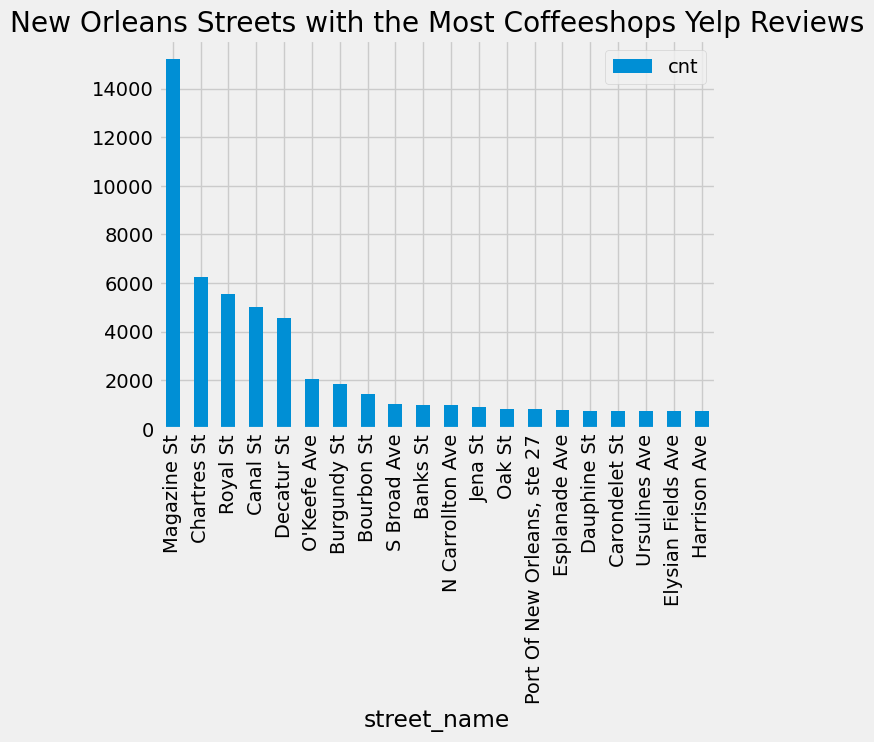

In [83]:
newOrleans_streets.plot.bar(x='street_name', y='cnt', title = 'New Orleans Streets with the Most Coffeeshops Yelp Reviews')

In [85]:
# New Orleans streets with the most coffeeshops visits
popular_newOrleans_streets = pysqldf('''SELECT 
                                    SUBSTR(b.address,    instr(b.address, ' ') + 1) AS street_name,
                                    COUNT(*) AS cnt
                                FROM checkins_separate AS c
                                LEFT JOIN business_coffee AS b
                                ON c.business_id = b.business_id
                                WHERE b.address IS NOT null and b.city = "New Orleans"
                                GROUP BY street_name
                                ORDER BY cnt DESC
                                LIMIT 20''') 

<AxesSubplot:title={'center':'New Orleans Streets with the Most Coffeeshops Visits'}, xlabel='street_name'>

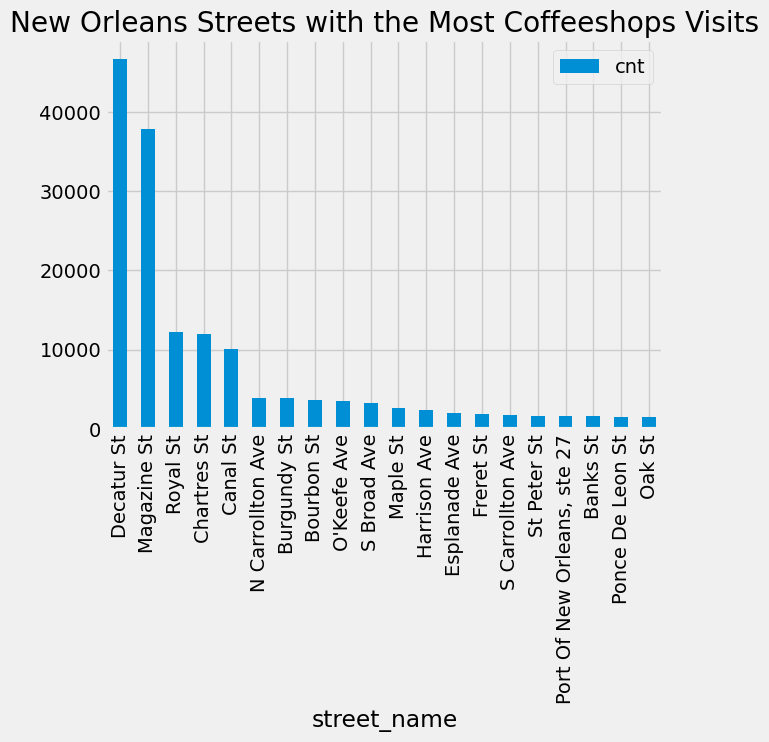

In [86]:
popular_newOrleans_streets.plot.bar(x='street_name', y='cnt', title = 'New Orleans Streets with the Most Coffeeshops Visits')

In [87]:
# What hours of operations are the most preferred by customers who enjoy going to coffeeshops?
# Hours of Operation of Top Rated Coffeeshops
pysqldf('''SELECT hours, COUNT(*) AS cnt
            FROM b_high_rating
            WHERE hours <> "{'Monday': '0:0-0:0'}"
            GROUP BY hours
            ORDER BY cnt DESC
            LIMIT 10''')

,hours,cnt
0,"{'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', 'Wednesday': '7:30-14:0', 'Thursday': '7:30-14:0', 'Friday': '7:30-14:0', 'Saturday': '7:30-15:0', 'Sunday': '7:30-15:0'}",7077
1,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', 'Wednesday': '8:0-18:0', 'Thursday': '8:0-18:0', 'Friday': '8:0-18:0', 'Saturday': '8:0-18:0', 'Sunday': '8:0-18:0'}",6067
2,"{'Monday': '0:0-0:0', 'Tuesday': '7:0-14:30', 'Wednesday': '7:0-14:30', 'Thursday': '7:0-14:30', 'Friday': '7:0-14:30', 'Saturday': '7:0-14:30', 'Sunday': '7:0-14:30'}",5678
3,"{'Monday': '0:0-0:0', 'Tuesday': '7:0-14:0', 'Wednesday': '7:0-14:0', 'Thursday': '7:0-14:0', 'Friday': '7:0-14:0', 'Saturday': '7:0-14:0', 'Sunday': '7:0-14:0'}",4648
4,"{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', 'Wednesday': '7:0-14:0', 'Thursday': '7:0-14:0', 'Friday': '7:0-14:0', 'Saturday': '7:0-14:0', 'Sunday': '7:0-14:0'}",4138
5,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', 'Wednesday': '8:0-15:0', 'Thursday': '8:0-15:0', 'Friday': '8:0-15:0', 'Saturday': '8:0-15:0', 'Sunday': '8:0-15:0'}",4080
6,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', 'Wednesday': '8:0-14:0', 'Thursday': '8:0-14:0', 'Friday': '8:0-14:0', 'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}",2904
7,"{'Monday': '8:0-14:0', 'Tuesday': '8:0-14:0', 'Wednesday': '8:0-14:0', 'Thursday': '8:0-14:0', 'Friday': '8:0-14:0', 'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}",2636
8,"{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', 'Wednesday': '7:0-15:0', 'Thursday': '7:0-15:0', 'Friday': '7:0-15:0', 'Saturday': '7:0-15:0', 'Sunday': '7:0-15:0'}",2568
9,"{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', 'Wednesday': '8:0-20:0', 'Thursday': '8:0-20:0', 'Friday': '8:0-20:0', 'Saturday': '8:0-20:0', 'Sunday': '8:0-20:0'}",2409


In [88]:
# assign it to a variable to plot a graph
common_hours = pysqldf('''SELECT hours, COUNT(*) AS cnt
            FROM b_high_rating
            WHERE hours <> "{'Monday': '0:0-0:0'}"
            GROUP BY hours
            ORDER BY cnt DESC
            LIMIT 10''')

<AxesSubplot:title={'center':'Hours of Operation of Top Rated Coffeeshops'}, xlabel='hours'>

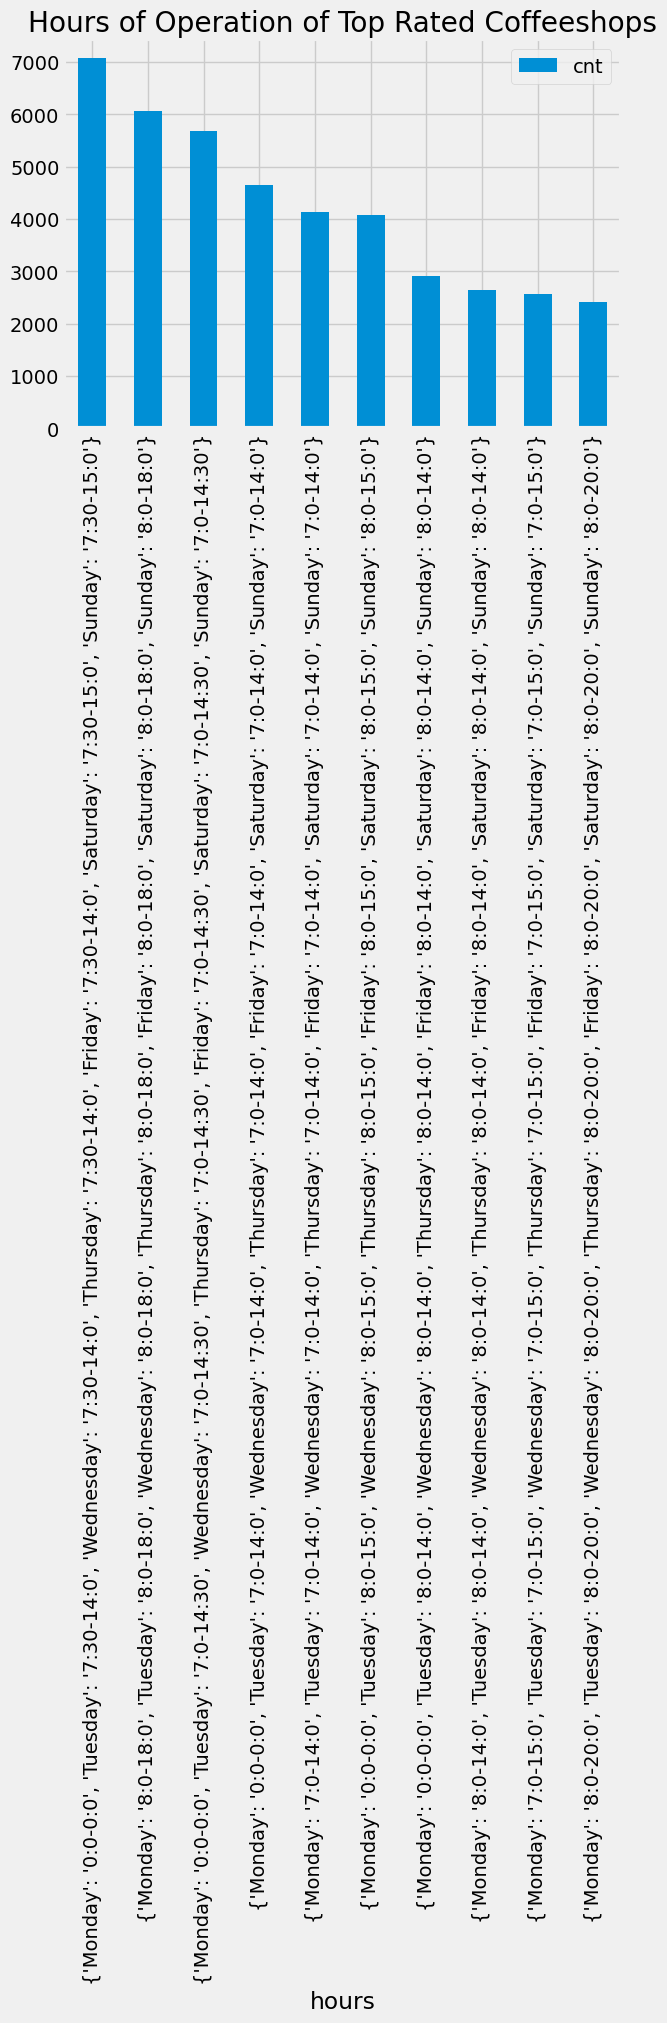

In [89]:
common_hours.plot.bar(x='hours', y='cnt', title = 'Hours of Operation of Top Rated Coffeeshops')